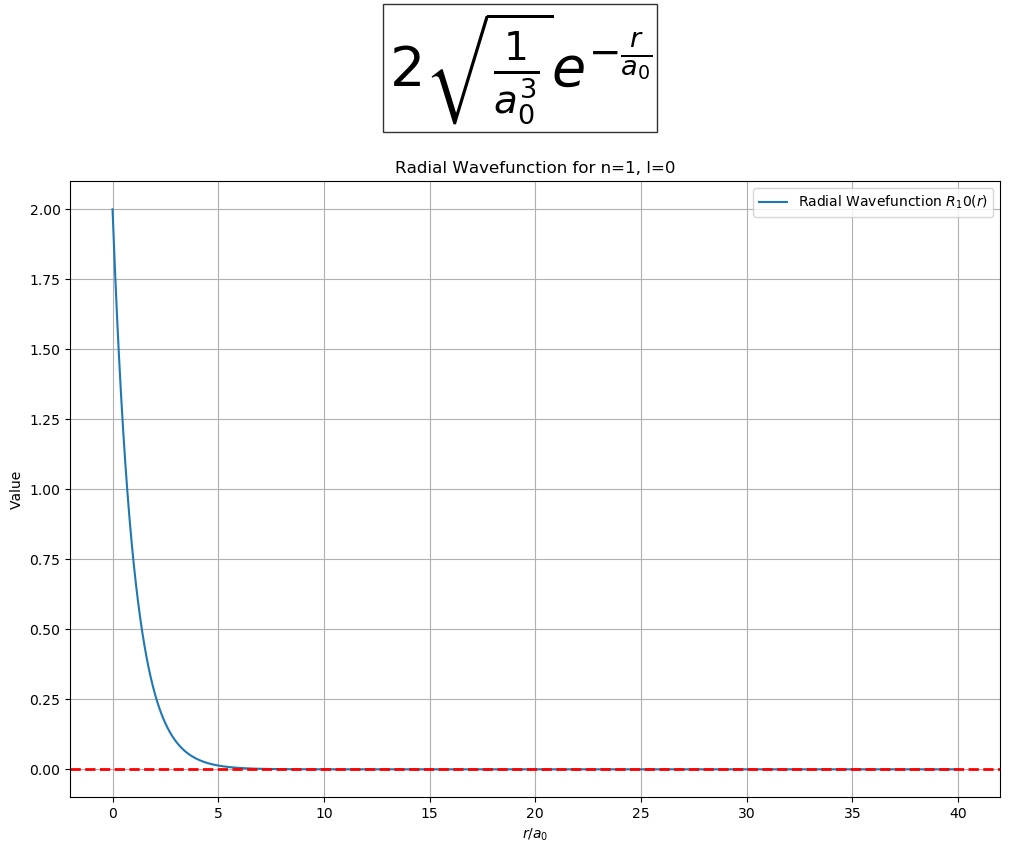

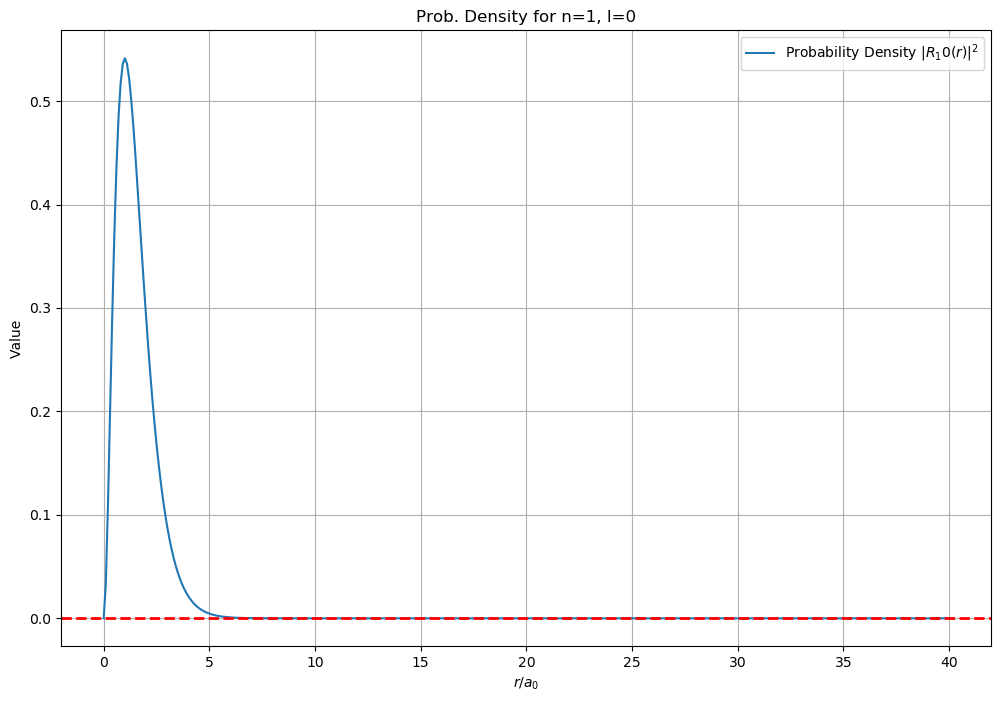

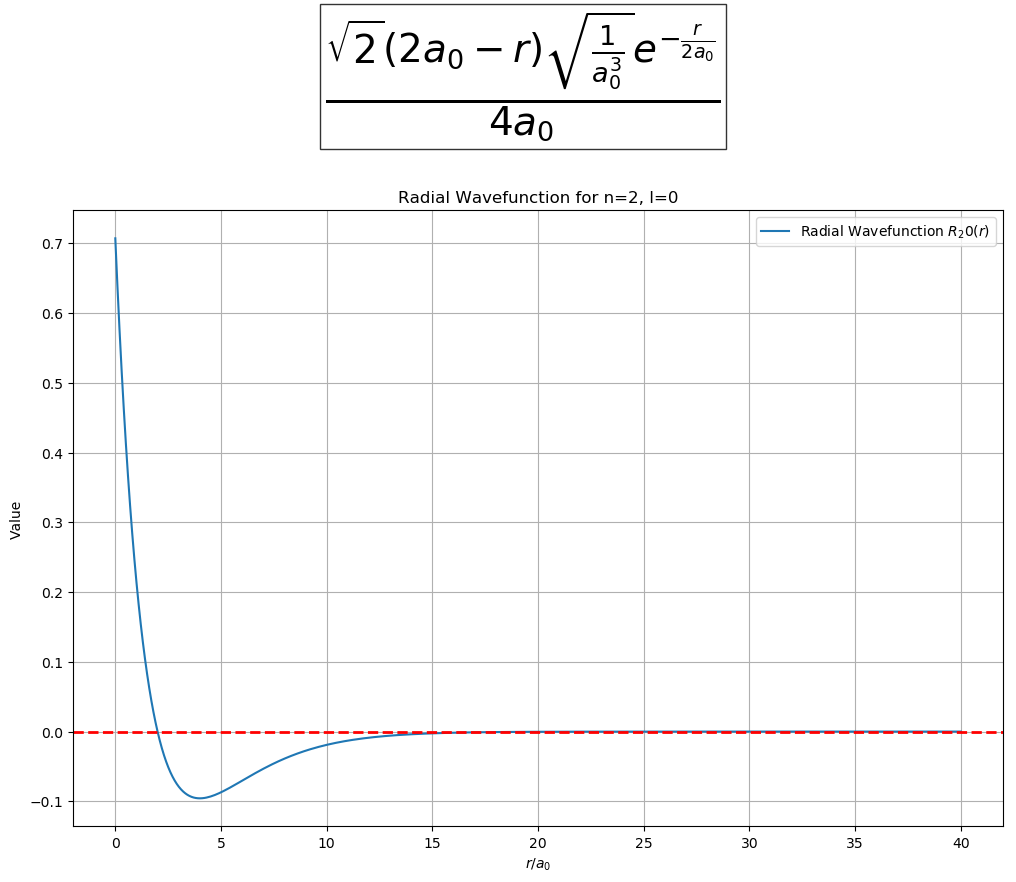

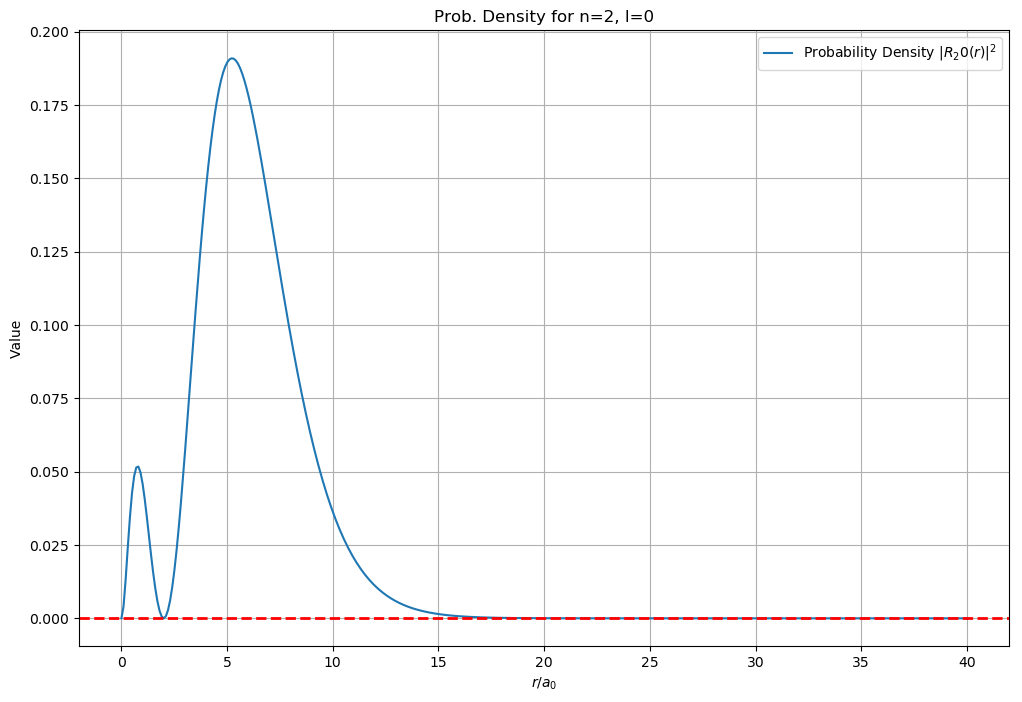

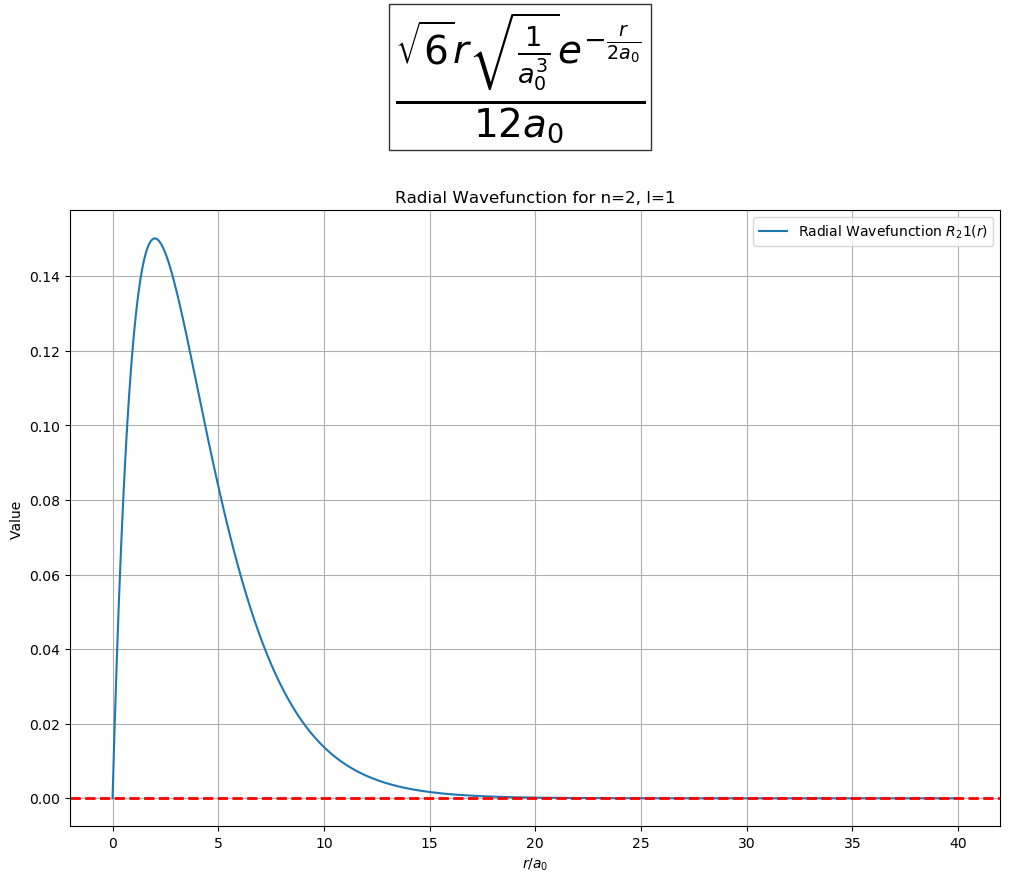

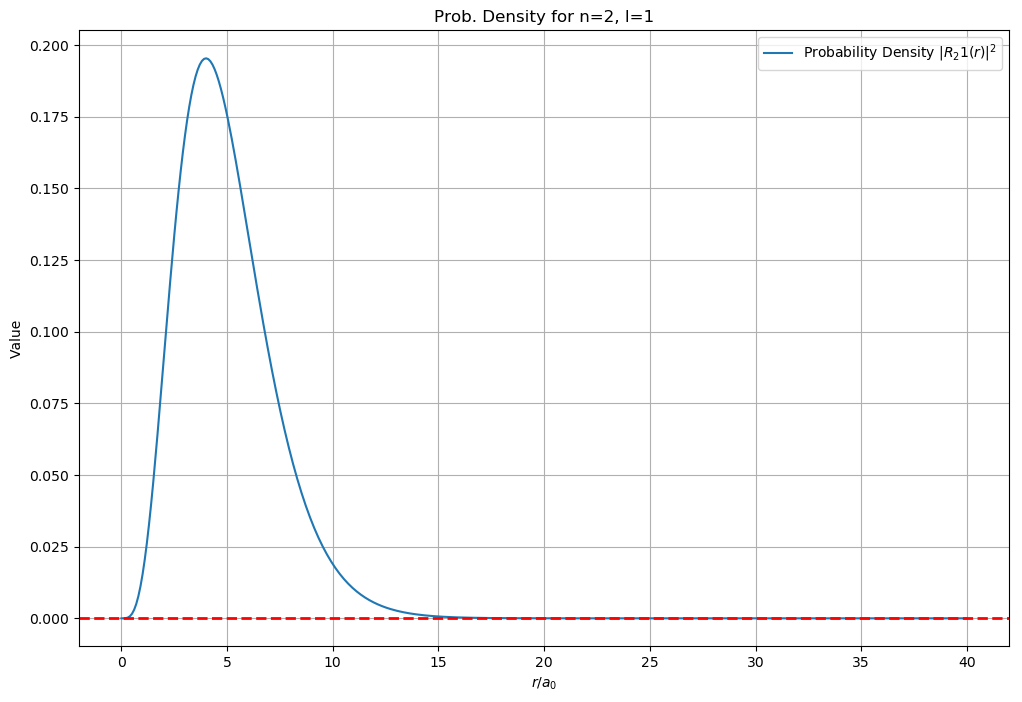

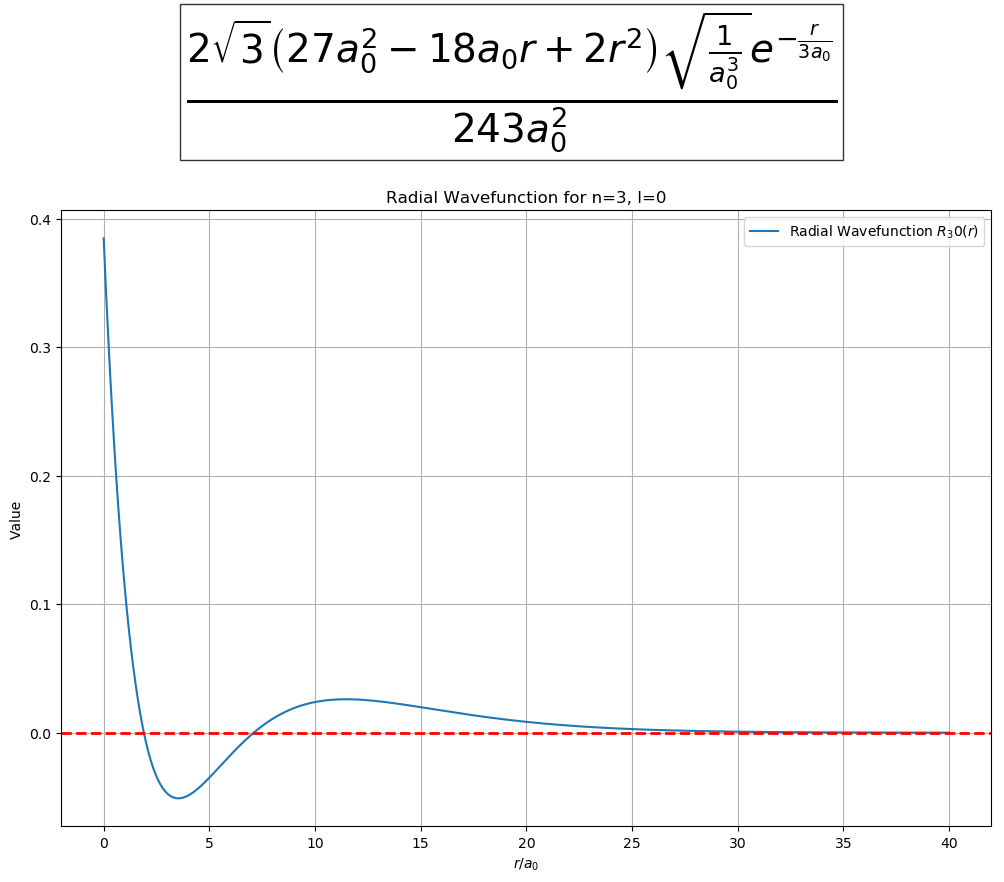

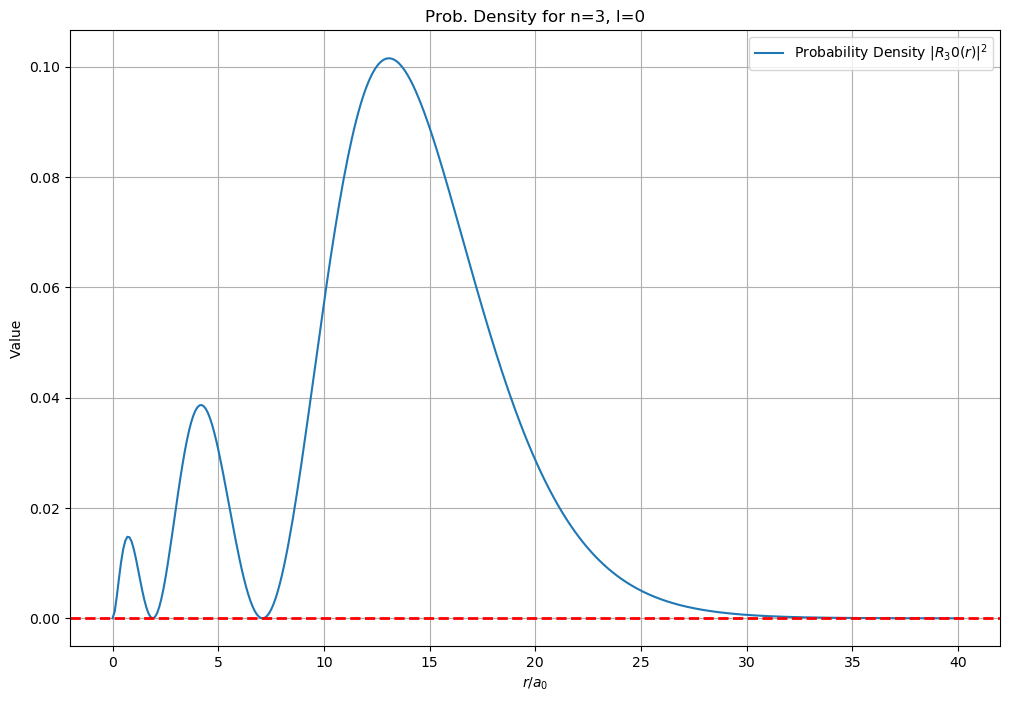

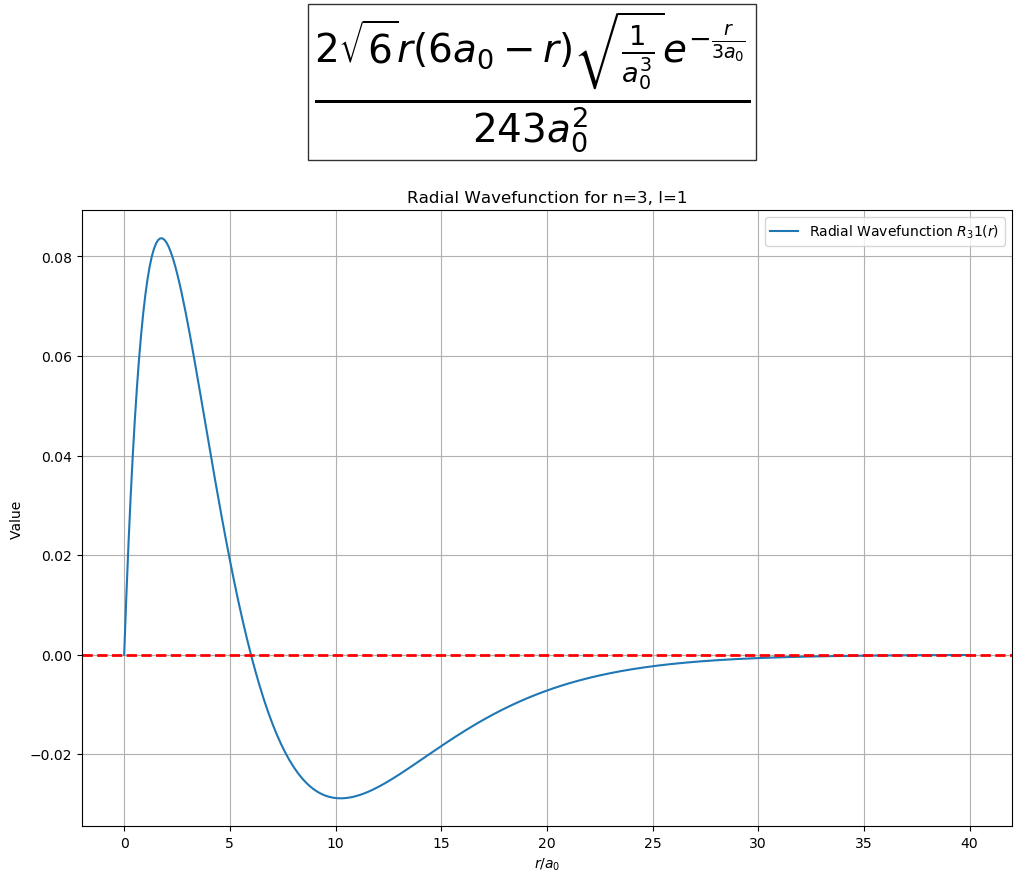

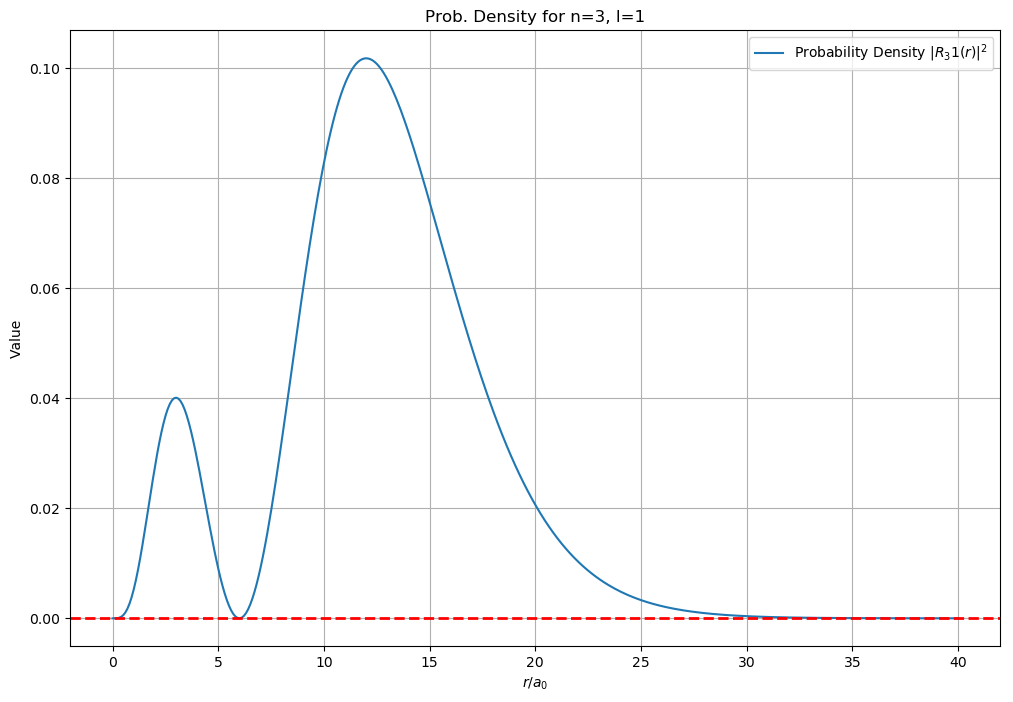

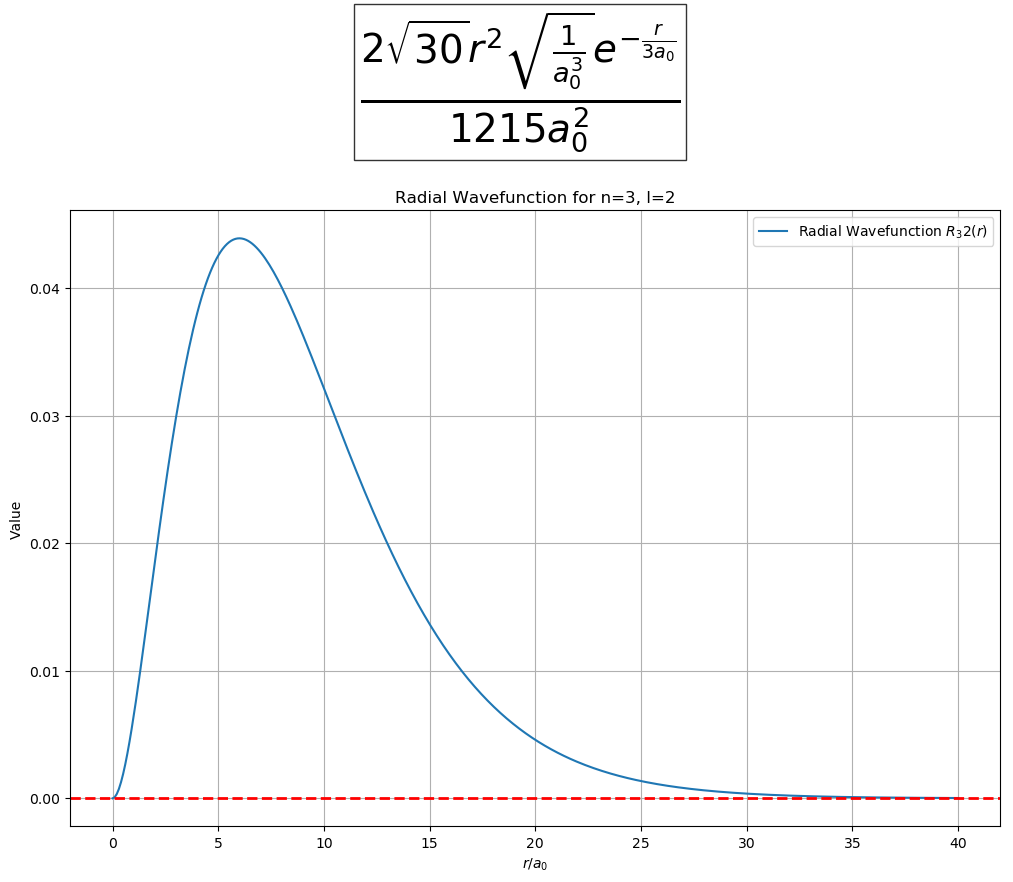

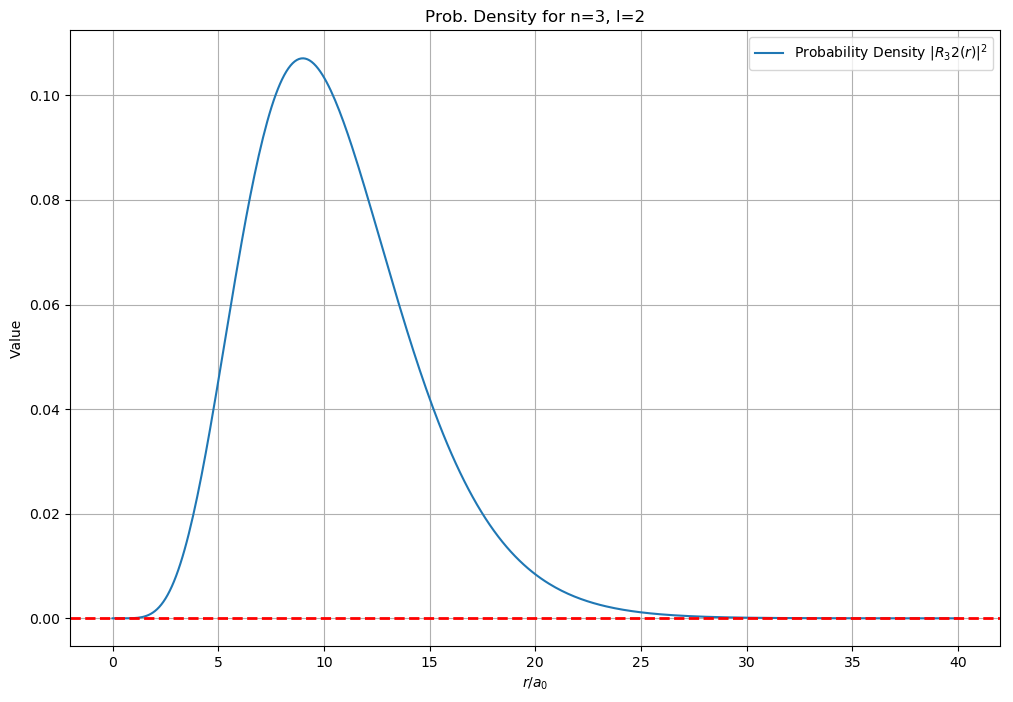

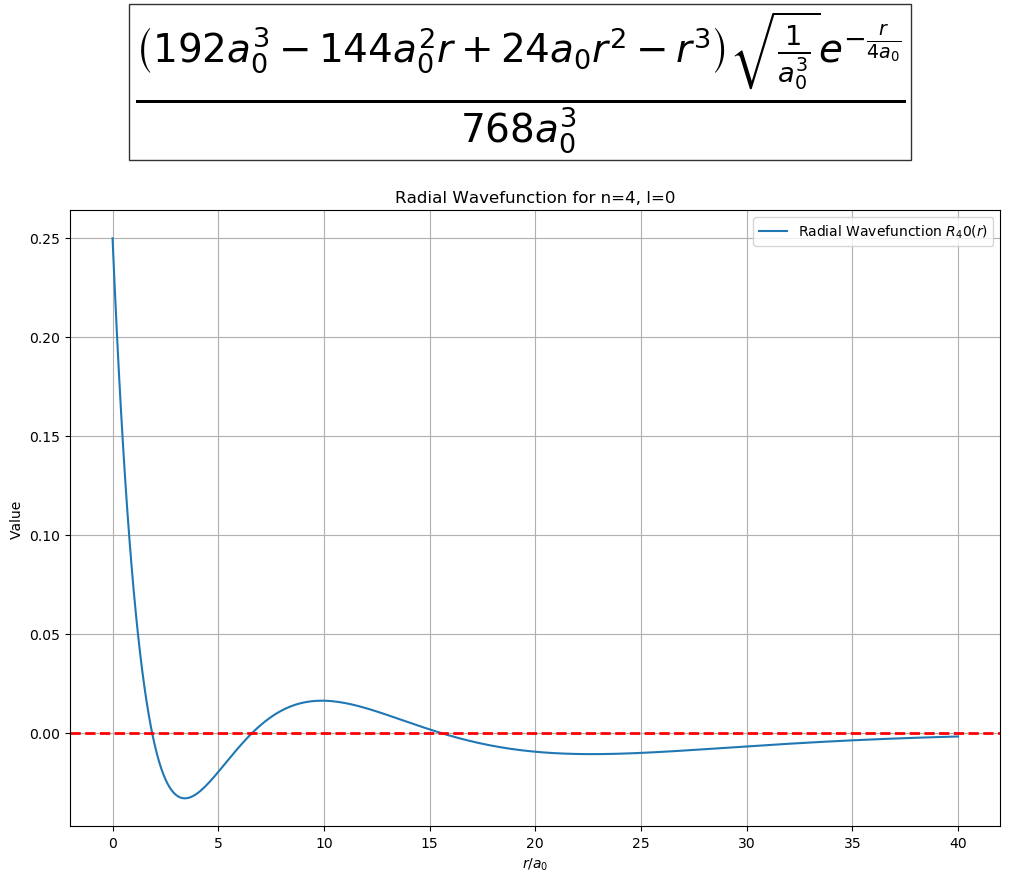

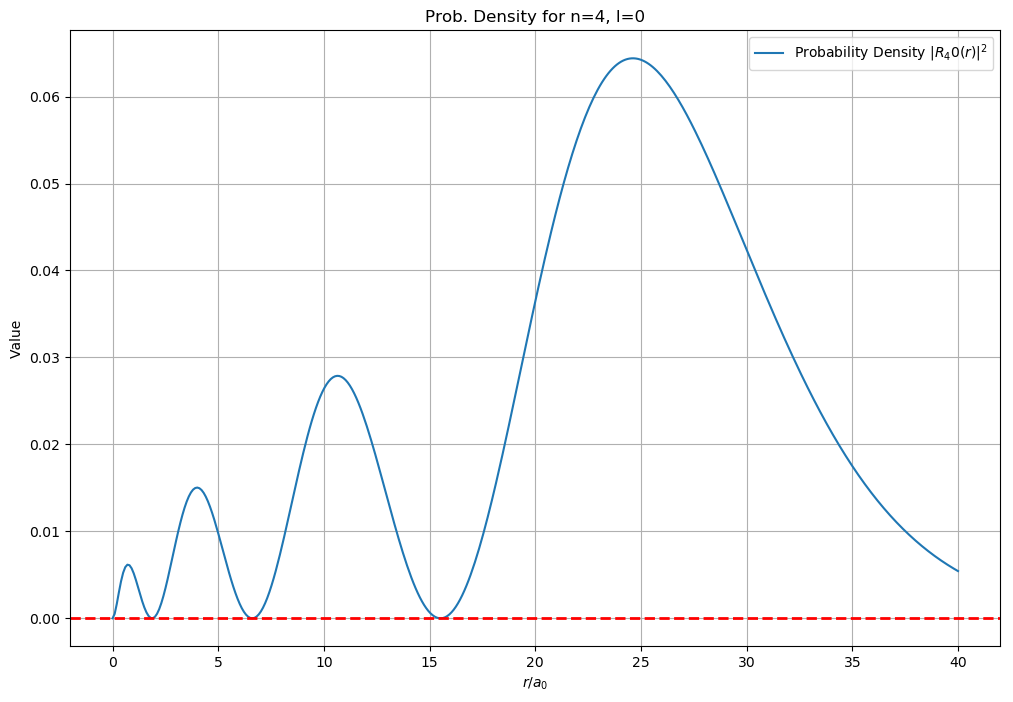

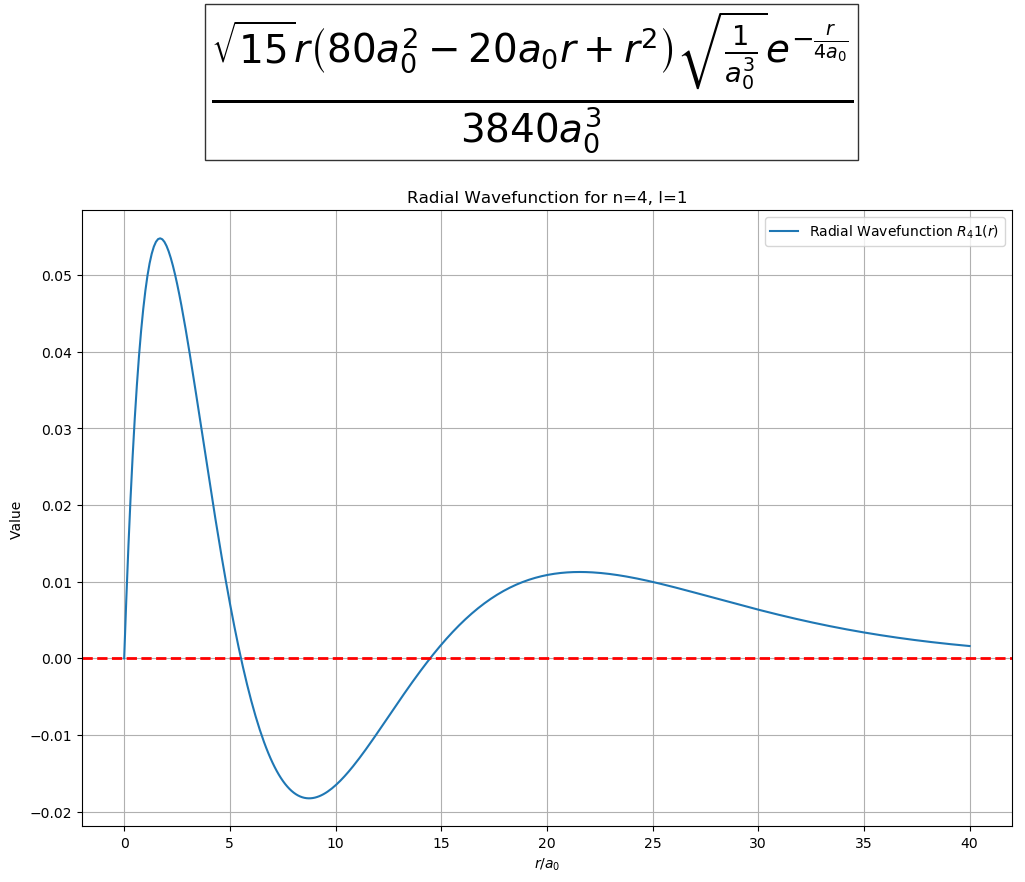

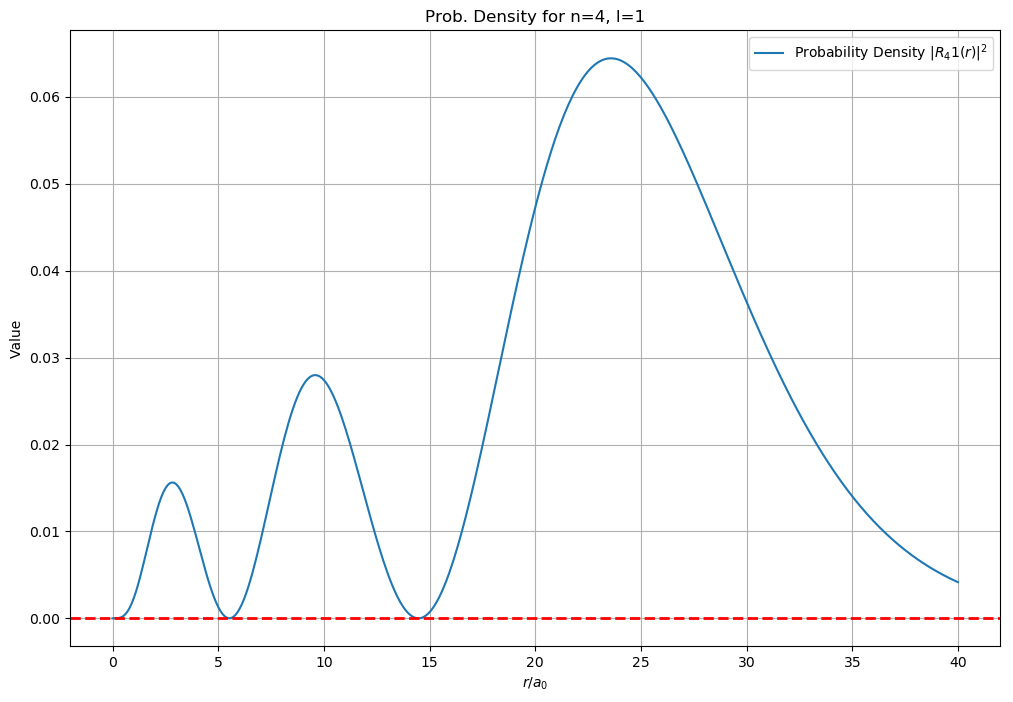

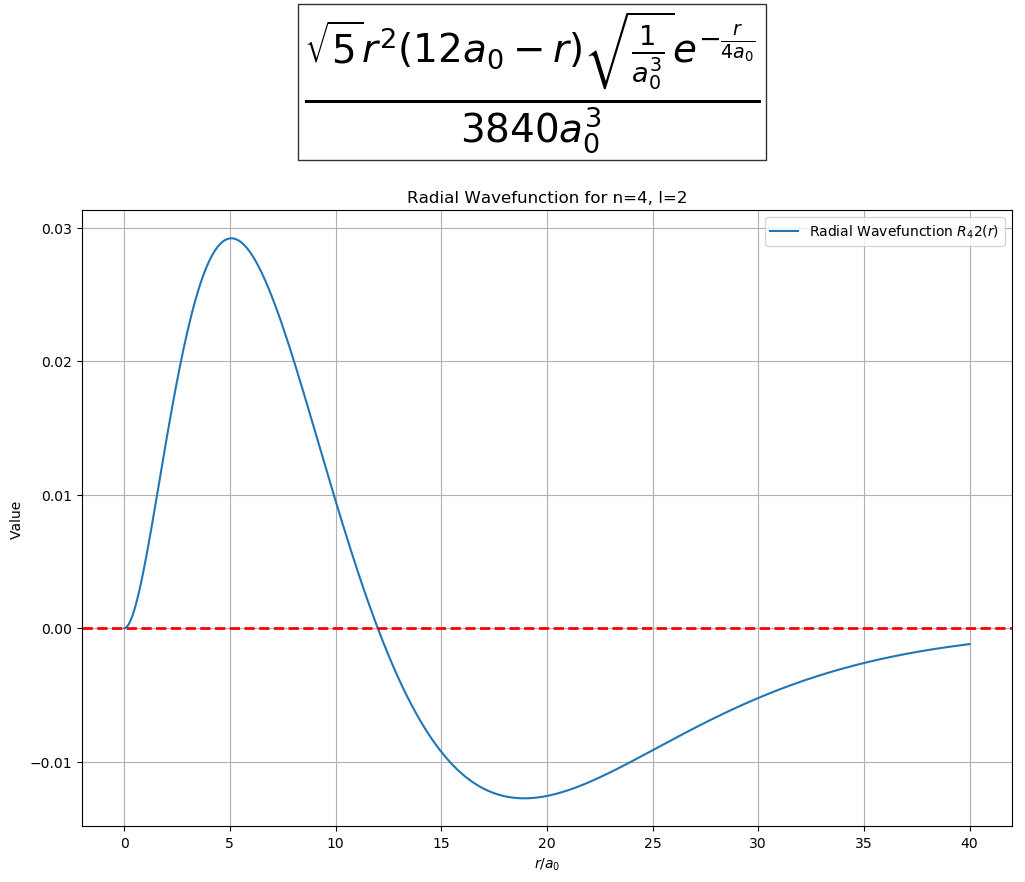

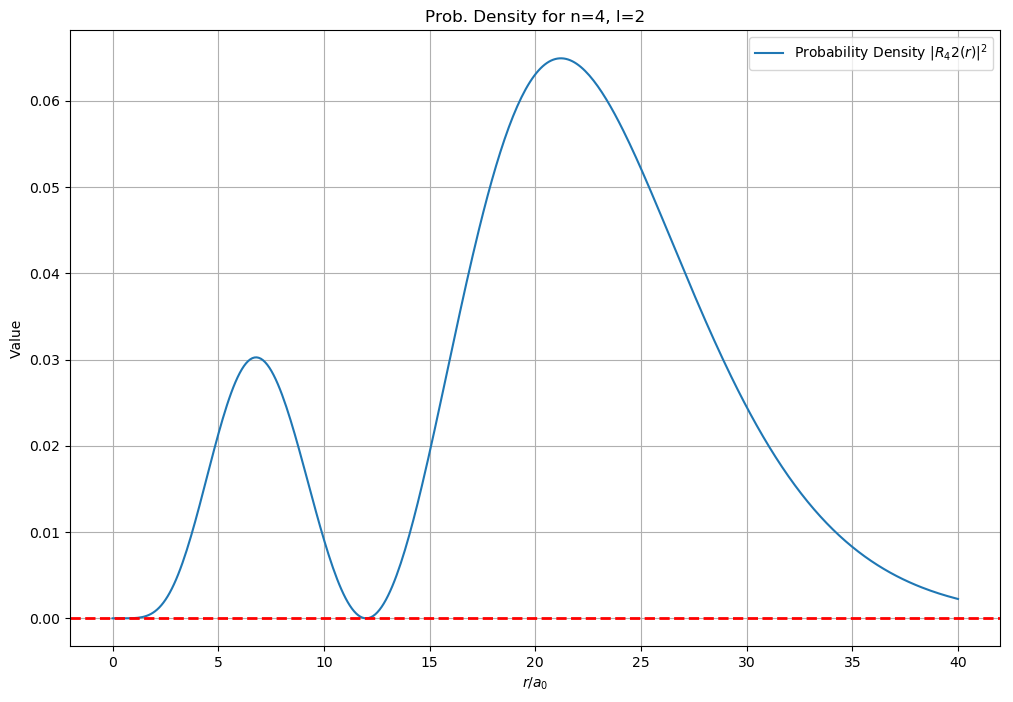

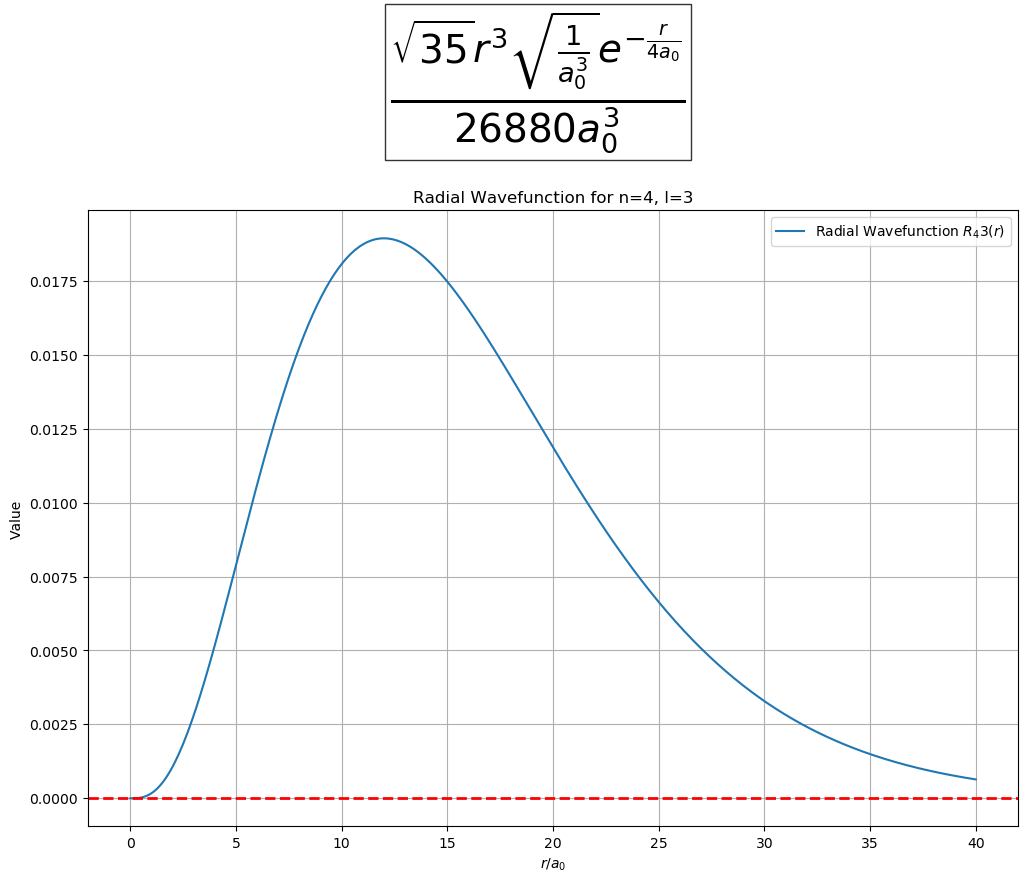

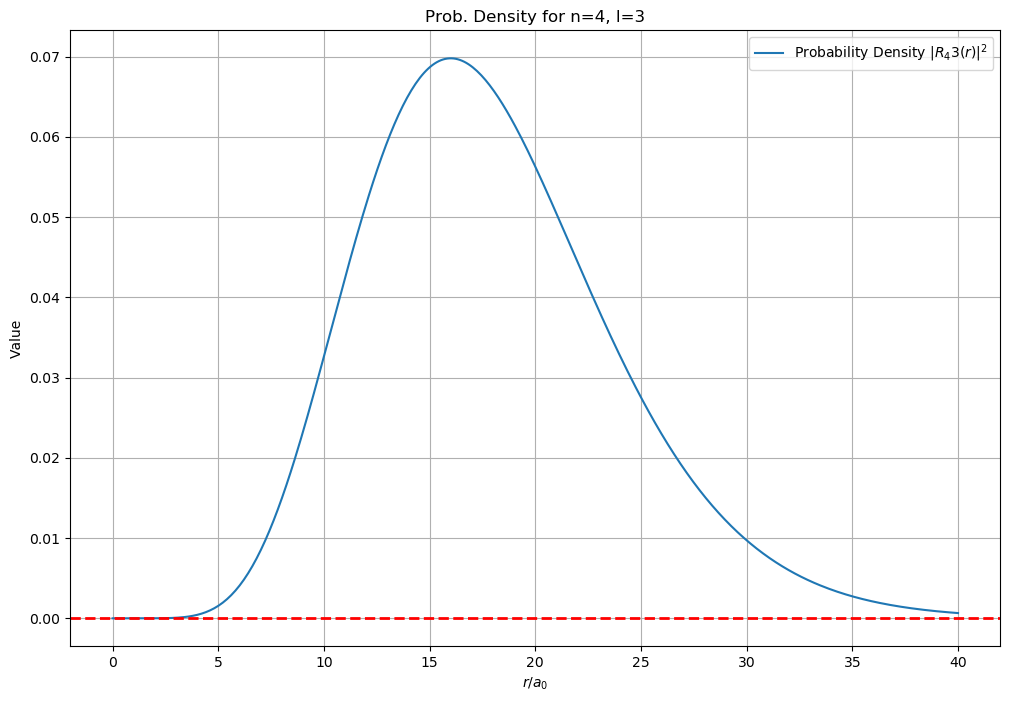

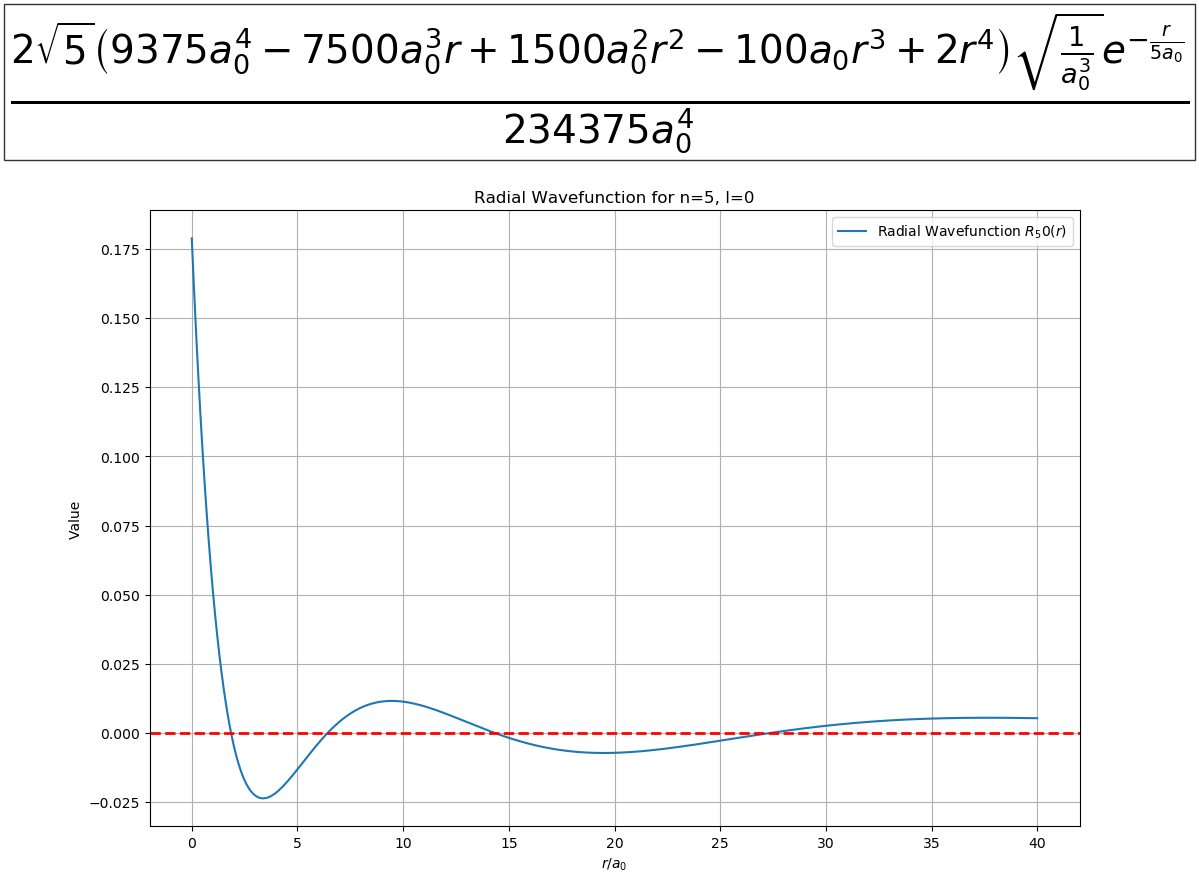

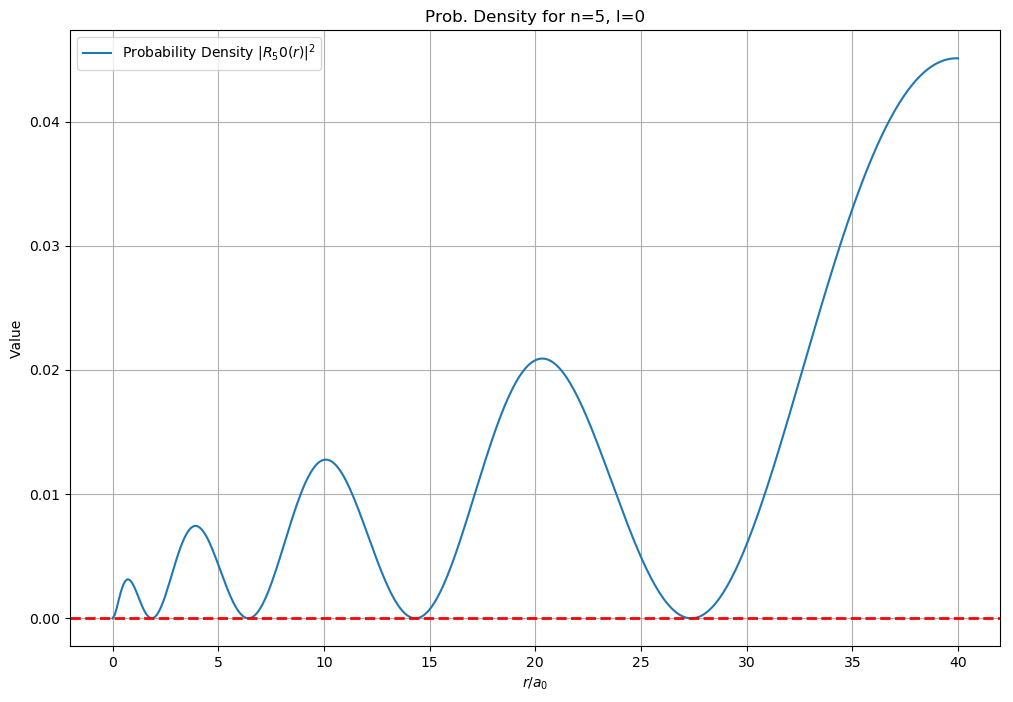

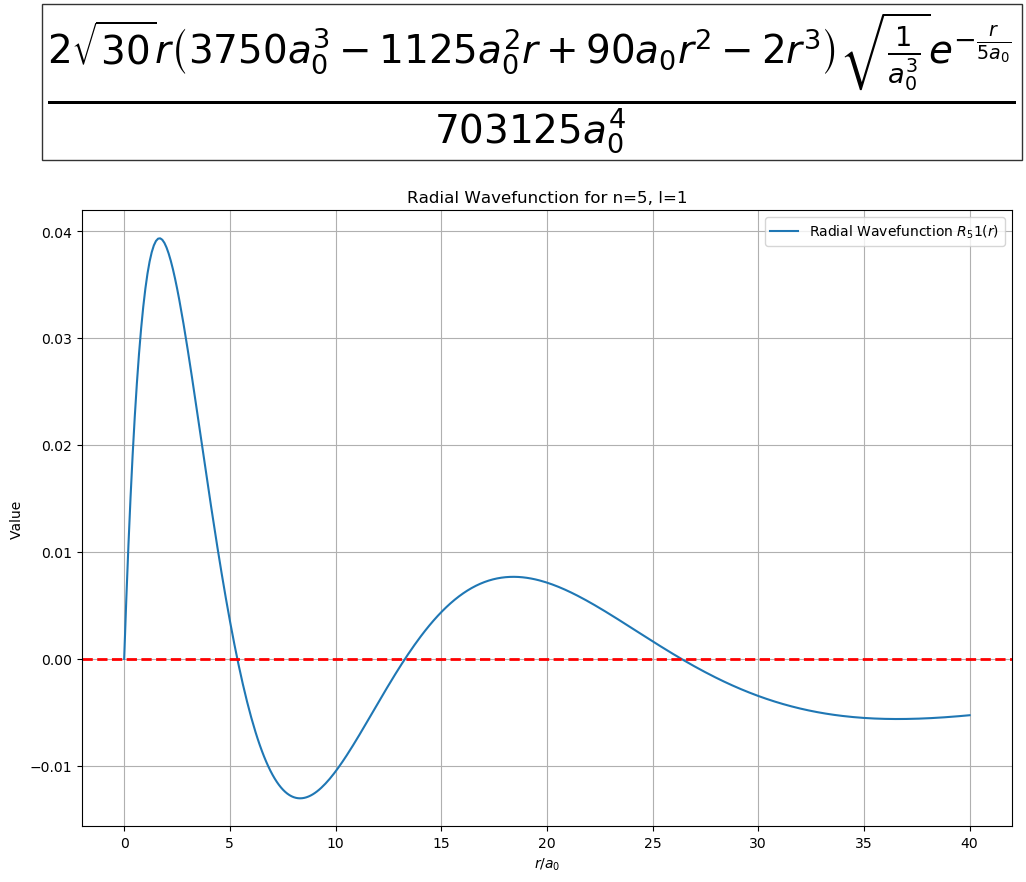

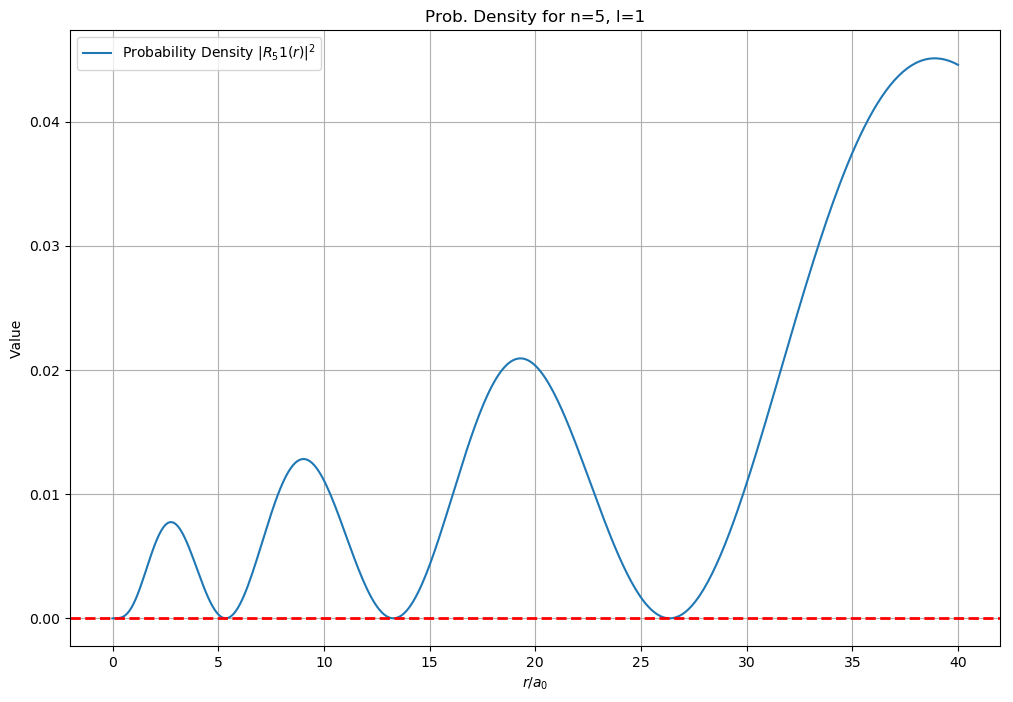

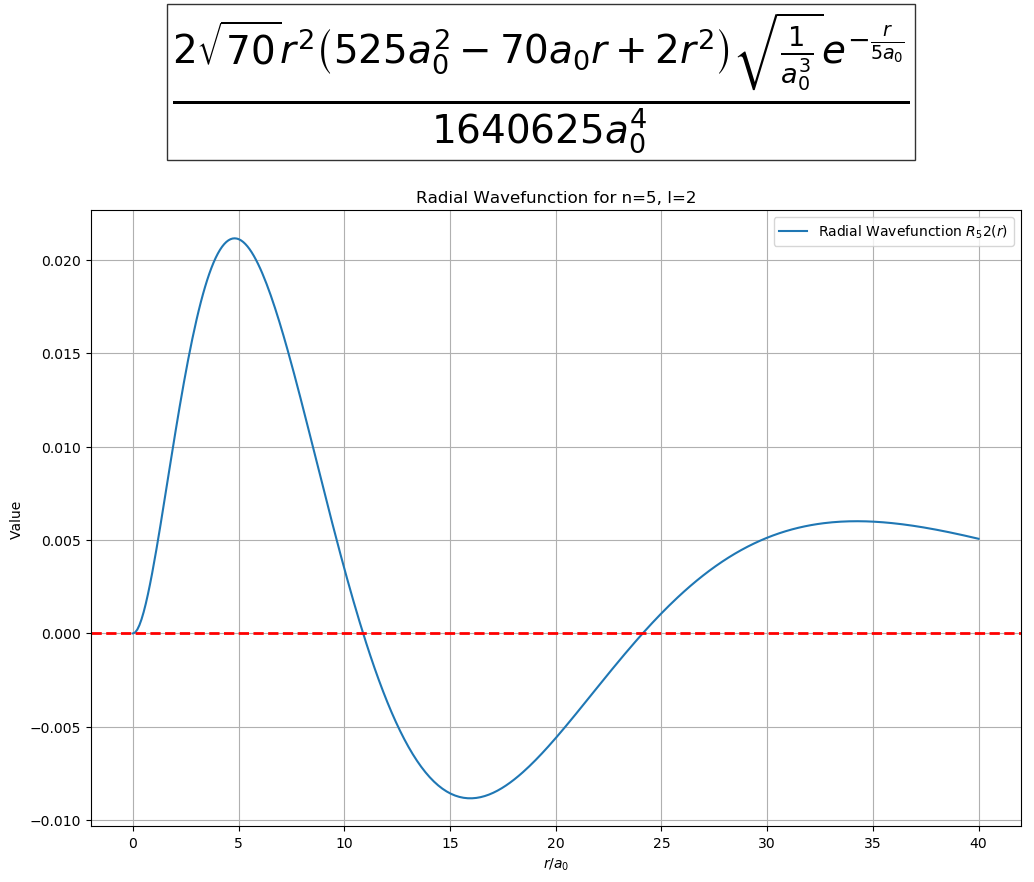

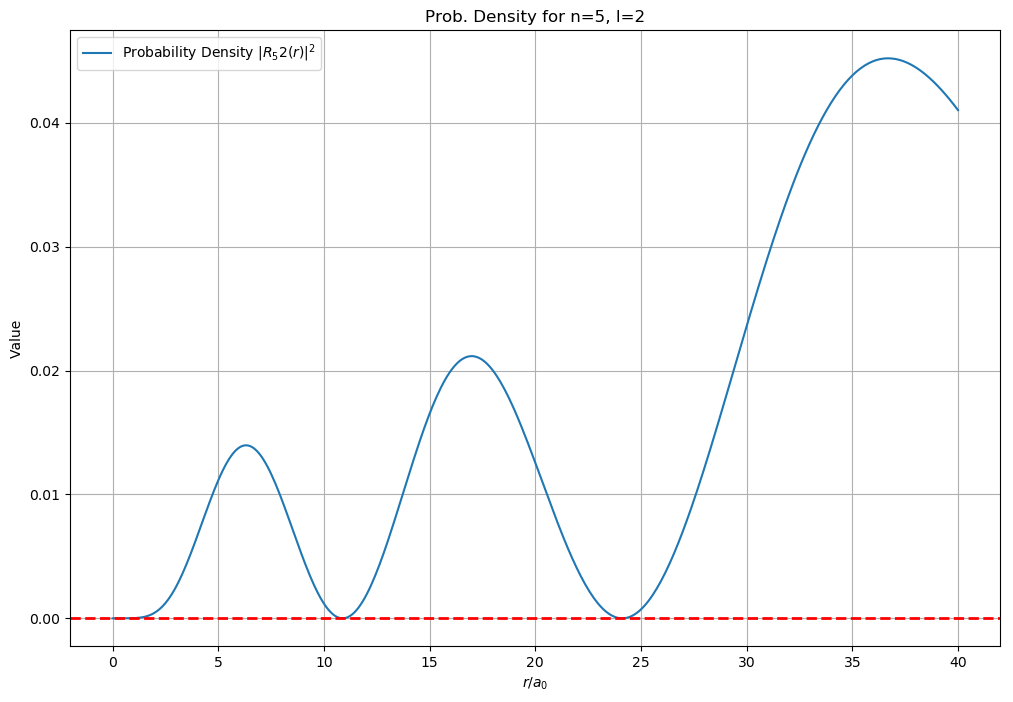

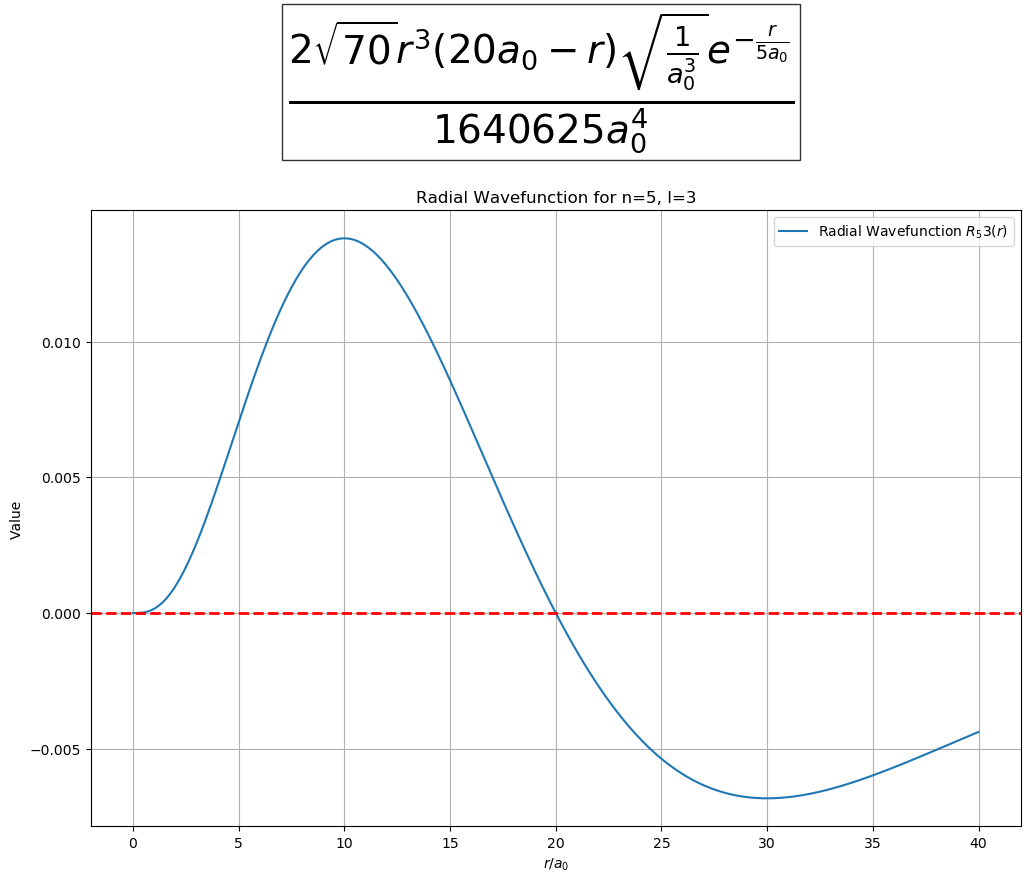

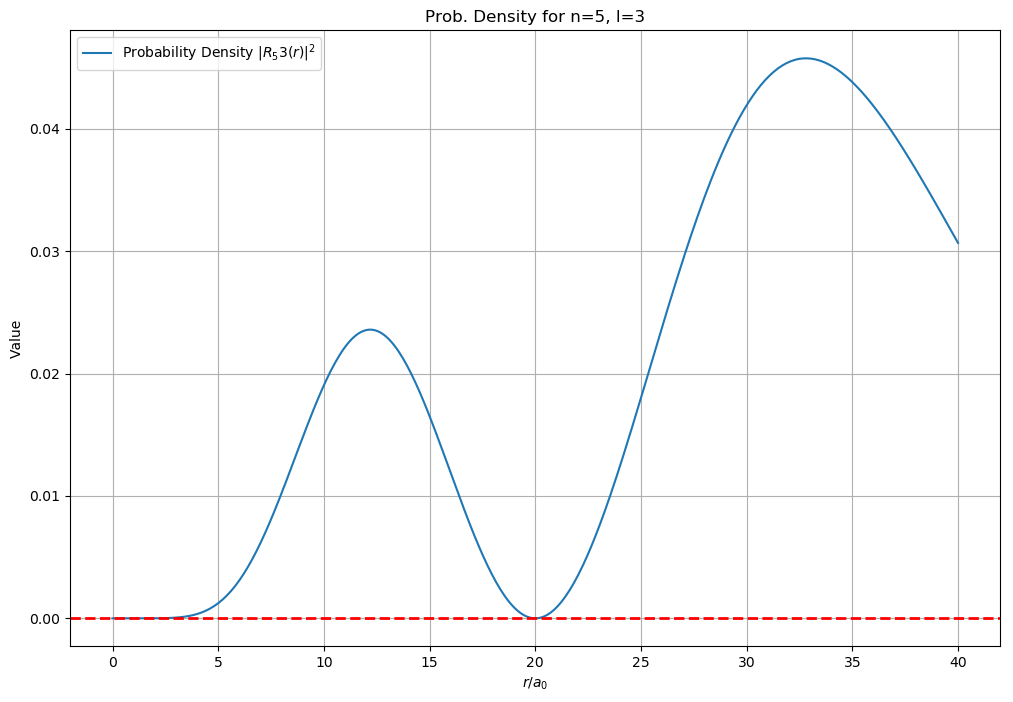

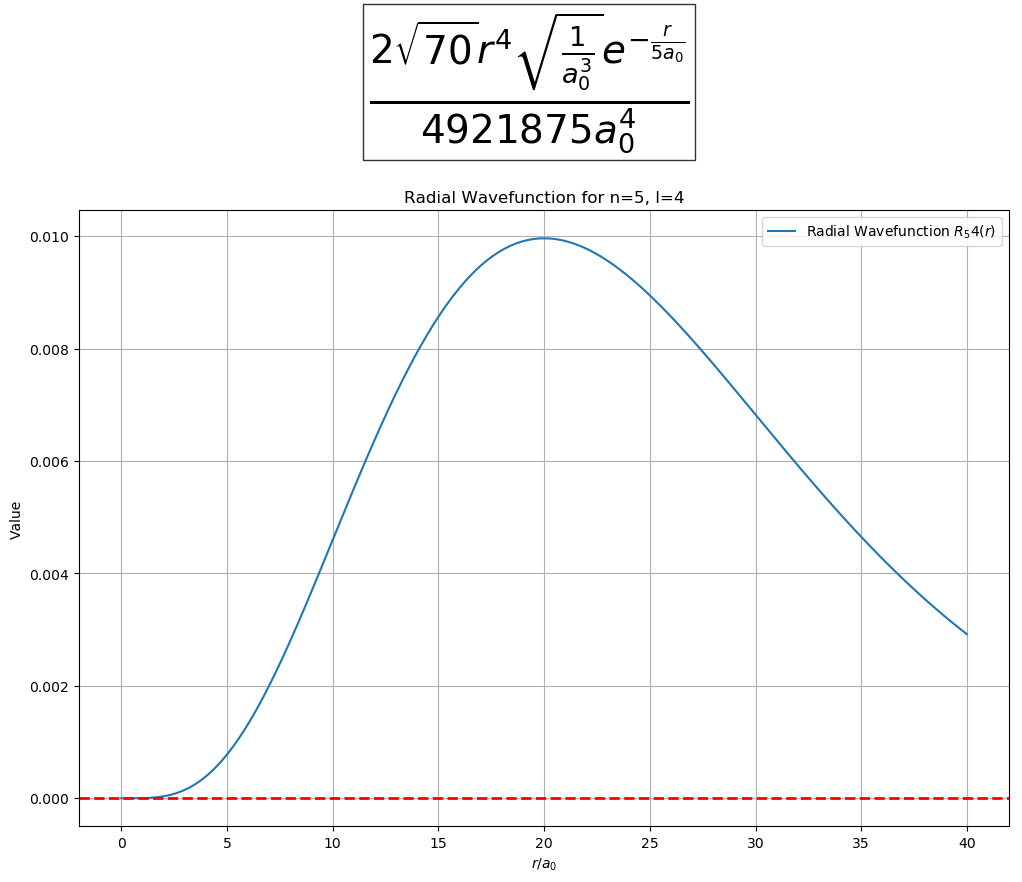

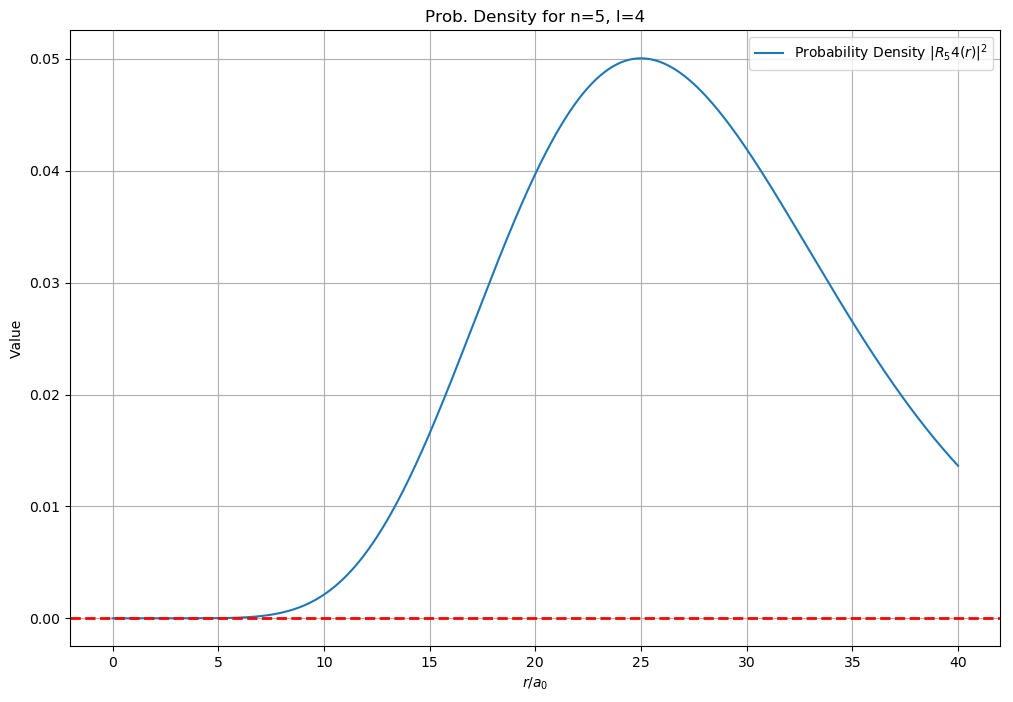

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import sympy as sym

# Define the function to evaluate the radial wavefunction
def eval_radial_wavefunction(n, l, r_values, a_0=1):
    rho_values = 2 * r_values / (n * a_0)
    k = n - l - 1
    # Evaluate the associated Laguerre polynomial
    L_values = sp.genlaguerre(k, 2 * l + 1)(rho_values)
    # Evaluate the full radial wavefunction
    R_values = np.sqrt((2 / (n * a_0))**3 * np.math.factorial(k) / (2 * n * np.math.factorial(k + 2 * l + 1))) * np.exp(-rho_values / 2) * rho_values**l * L_values
    return R_values

# Define the function to get the symbolic radial wavefunction
def symbolic_radial_wavefunction(n, l):
    r, a_0 = sym.symbols('r a_0', real=True)
    rho = 2 * r / (n * a_0)
    k = n - l - 1
    # Generate the associated Laguerre polynomial
    L = sym.assoc_laguerre(k, 2 * l + 1, rho)
    # Generate the full radial wavefunction
    R = sym.sqrt((2 / (n * a_0))**3 * sym.factorial(k) / (2 * n * sym.factorial(k + 2 * l + 1))) * sym.exp(-rho / 2) * rho**l * L
    return sym.simplify(R)

# Define a range for r/a_0
r_values = np.linspace(0, 40, 400)

# Generate and plot data for all selections of n and l for n = 1, 2, 3, 4, 5
for n in range(1, 6):
    for l in range(n):
        y_values = eval_radial_wavefunction(n, l, r_values)
        y_prob_density = (r_values**2) * (y_values**2)
        radial_wavefunction = symbolic_radial_wavefunction(n, l)
        
        # Create the plot
        plt.figure(figsize=(12, 8))
        plt.plot(r_values / 1, y_values, label=f'Radial Wavefunction $R_{n}{l}(r)$')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('$r/a_0$')
        plt.ylabel('Value')
        plt.title(f'Radial Wavefunction for n={n}, l={l}')
        plt.legend()
        plt.grid(True)
        plt.gcf().text(0.5, 1.0, f'${sym.latex(radial_wavefunction)}$', fontsize=40, ha='center', bbox=dict(facecolor='white', alpha=0.8))
        plt.show()
        
        plt.figure(figsize=(12, 8))
        plt.plot(r_values / 1, y_prob_density, label=f'Probability Density $|R_{n}{l}(r)|^2$')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('$r/a_0$')
        plt.ylabel('Value')
        plt.title(f'Prob. Density for n={n}, l={l}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Display the symbolic form of the radial wavefunction

